# Titanic from scratch

Looking at the [titanic](https://www.kaggle.com/competitions/titanic) kaggle competition without a high level framework, building a linear model or NN from scratch.

## Data

In [1]:
import pandas as pd
import numpy as np

train_frames = pd.read_csv("data/titanic/train.csv")
test_frames = pd.read_csv("data/titanic/test.csv")

train_frames.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Clean the data (age, cabin and embarked all have NA fields on some rows)
# Replace NA with mode
# Could do a lot better here, eg. Predict a persons age based on other fields

for frames in [train_frames, test_frames]:
    modes = frames.mode().iloc[0]  # Mode returns multiple if there is a "tie" for the mode
    frames.fillna(modes, inplace=True)

train_frames.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [3]:
train_frames.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

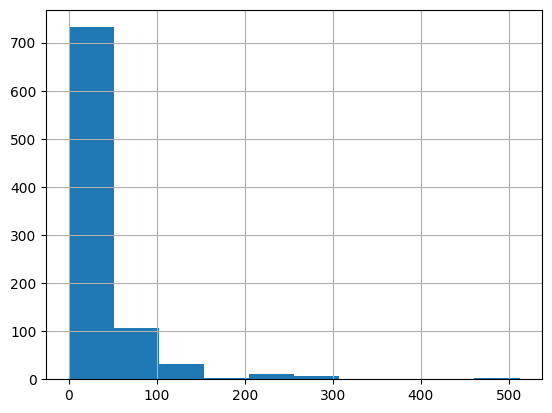

In [4]:
# Fare looks like its a distribution with a long tail - yup
# Lots of models dont like this (linear, NNs)
train_frames["Fare"].hist()

<Axes: >

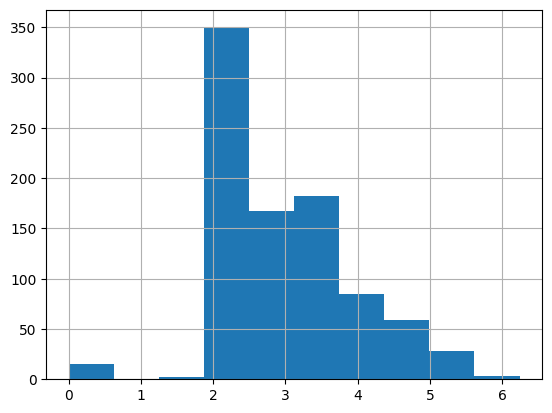

In [5]:
# Lets take the log and use that instead
for frames in [train_frames, test_frames]:
    frames["LogFare"] = np.log(frames["Fare"] + 1)

# Thats better
train_frames["LogFare"].hist()

In [6]:
pass_classes = sorted(train_frames.Pclass.unique())
pass_classes

[1, 2, 3]

In [7]:
# We have some fields that are text fields but really categories, lets add dummy fields to represent them as 0 or 1

cat_columns = ["Sex", "Pclass", "Embarked"]
train_frames = pd.get_dummies(train_frames, columns=cat_columns)
test_frames = pd.get_dummies(test_frames, columns=cat_columns)

added_cols = ["Sex_male", "Sex_female", "Pclass_1", "Pclass_2", "Pclass_3", "Embarked_C", "Embarked_Q", "Embarked_S"]
train_frames.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,1,0,0,1,0,0,1


## Tensors

In [8]:
import torch as torch
from torch import tensor

torch.manual_seed(442)

# Our dependent variable as a tensor (the thing we are trying to predict)
t_dep = tensor(train_frames.Survived)

In [9]:
# Our independent variables (the things we are using to predict) as tensors

indep_cols = ["Age", "SibSp", "Parch", "LogFare"] + added_cols
t_indep = tensor(train_frames[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [10]:
# Could think of as [rows, cols] in shape
t_indep.shape

torch.Size([891, 12])

In [11]:
# Rank is 2 (number of dimensions)
len(t_indep.shape)

2

## Linear model

In [12]:
# Need a random coefficient for each col to start
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff) - 0.5  # Between 0 and 1 so subtract to center them
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [13]:
# We're going to multiply each row by the coefficients like this (using broadcasting)
t_indep * coeffs

tensor([[-10.1838,   0.1386,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.1096,   0.1386,   0.4818,  ...,  -0.0000,   0.0000,   0.3625],
        [-12.0354,   0.0000,   0.0000,  ...,  -0.4392,   0.0000,   0.0000],
        [-14.8128,   0.0000,   0.0000,  ...,  -0.0000,   0.2103,   0.0000]])

In [14]:
# One problem is that when we sum these up the first column (Age) is going to dominate things
# Lets make everything between 0 and 1 to prevent things like that
vals, indices = t_indep.max(dim=0)
t_indep = t_indep / vals

# This looks better now
t_indep * coeffs

tensor([[-0.1273,  0.0173,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000,  ..., -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1389,  0.0173,  0.0803,  ..., -0.0000,  0.0000,  0.3625],
        [-0.1504,  0.0000,  0.0000,  ..., -0.4392,  0.0000,  0.0000],
        [-0.1852,  0.0000,  0.0000,  ..., -0.0000,  0.2103,  0.0000]])

In [15]:
# Lets make a prediction
preds = (t_indep * coeffs).sum(axis=1)
preds[:20]

tensor([ 0.1927, -0.6239,  0.0979,  0.2056,  0.0968,  0.0066,  0.1306,  0.3476,
         0.1613, -0.6285,  0.2579,  0.0796,  0.1836,  0.2457,  0.1676, -0.0595,
         0.2014,  0.1783,  0.0589, -0.6892])

In [16]:
# That works bit isn't much use with random coefficients, time for gradient descent

# We need a loss function, lets take the average error of the rows (abs val of the diff between prediction and dependent)
loss = torch.abs(preds - t_dep).mean()
loss

tensor(0.5382)

In [17]:
# Lets shove predictions and loss into some functions


def calc_preds(coeffs, indeps):
    return (indeps * coeffs).sum(axis=1)


def calc_loss(preds, deps):
    return torch.abs(preds - deps).mean()

### Single gradient descent step

In [18]:
# We want the pytorch to calculate the derivatives for the coefficients for us
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [19]:
# Now we get a gradient function for the loss
preds = calc_preds(coeffs, t_indep)
loss = calc_loss(preds, t_dep)
loss

tensor(0.5382, grad_fn=<MeanBackward0>)

In [20]:
loss.backward()
coeffs.grad

tensor([-0.0106,  0.0129, -0.0041, -0.0484,  0.2099, -0.2132, -0.1212, -0.0247,
         0.1425, -0.1886, -0.0191,  0.2043])

In [21]:
# Lets  tweak the coeffs and see what happens

lr = 0.1
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    preds = calc_preds(coeffs, t_indep)
    loss = calc_loss(preds, t_dep)

# Hurray, run this multiple times and we are gradient descending
loss

tensor(0.5197)

### Training the linear model

In [22]:
# We need to split the training data to get validation
from fastai.data.transforms import RandomSplitter

# List of the indexes of the rows for each split
trn_split, val_split = RandomSplitter(seed=42)(train_frames)

# So lets create them
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

In [23]:
# We'll need our coefficient update in a function


def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)


# And a run of a single training epoch
def one_epoch(coeffs, lr):
    preds = calc_preds(coeffs, t_indep)
    loss = calc_loss(preds, t_dep)

    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)

    print(f"Epoch loss: {loss}")


# A function to initialise coeffs
def init_coeffs():
    return (torch.rand(n_coeff) - 0.5).requires_grad_()


# And now the function to run it all
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs, lr)

    return coeffs

In [24]:
# Lets run it - it kind works!
coeffs = train_model()

Epoch loss: 0.5382388234138489
Epoch loss: 0.5361900925636292
Epoch loss: 0.5322386622428894
Epoch loss: 0.526789665222168
Epoch loss: 0.5199053883552551
Epoch loss: 0.5118916630744934
Epoch loss: 0.5029719471931458
Epoch loss: 0.4938746690750122
Epoch loss: 0.4850544333457947
Epoch loss: 0.47758927941322327
Epoch loss: 0.46983984112739563
Epoch loss: 0.45848366618156433
Epoch loss: 0.4428435266017914
Epoch loss: 0.42341259121894836
Epoch loss: 0.4032250642776489
Epoch loss: 0.38677313923835754
Epoch loss: 0.3714464008808136
Epoch loss: 0.35796841979026794
Epoch loss: 0.34542733430862427
Epoch loss: 0.3327818512916565
Epoch loss: 0.320084810256958
Epoch loss: 0.3085974454879761
Epoch loss: 0.29809021949768066
Epoch loss: 0.2919977605342865
Epoch loss: 0.2920628786087036
Epoch loss: 0.3002709150314331
Epoch loss: 0.3108963072299957
Epoch loss: 0.32415151596069336
Epoch loss: 0.34188657999038696
Epoch loss: 0.36107301712036133


In [25]:
# Lets see what coefficeints we ended up with
def show_coeffs():
    return dict(zip(indep_cols, coeffs.requires_grad_(False)))


show_coeffs()

{'Age': tensor(-0.1853),
 'SibSp': tensor(0.0804),
 'Parch': tensor(0.2489),
 'LogFare': tensor(0.1676),
 'Sex_male': tensor(-0.4891),
 'Sex_female': tensor(0.5091),
 'Pclass_1': tensor(0.9221),
 'Pclass_2': tensor(0.4678),
 'Pclass_3': tensor(0.2891),
 'Embarked_C': tensor(0.3304),
 'Embarked_Q': tensor(0.3515),
 'Embarked_S': tensor(0.0496)}

### Measuring accuracy

In [26]:
# The kaggle competition is judging us on accuracy (proportion of rows where we got the answer correct)
# of predictions not on loss, so lets calculate that

preds = calc_preds(coeffs, val_indep)

# Lets have >0.5 == survive
results = val_dep.bool() == (preds > 0.5)

In [27]:
# Shove it in a function for the future
def accuracy(coeffs):
    preds = calc_preds(coeffs, val_indep)
    results = val_dep.bool() == (preds > 0.5)
    return results.float().mean()


accuracy(coeffs)

tensor(0.7921)

### Using sigmoid

In [28]:
# Note that sometimes we predict >1 or <0 for survival which doesnt make much sense
preds[:20]

tensor([ 1.3423,  0.1541,  0.1314,  0.1022,  0.0411,  0.0425,  1.2325,  1.0324,
         0.0843,  1.2091, -0.1658,  0.2012, -0.0412,  1.1527, -0.1752,  0.4674,
         0.4210,  1.0985,  0.0264,  0.8369])

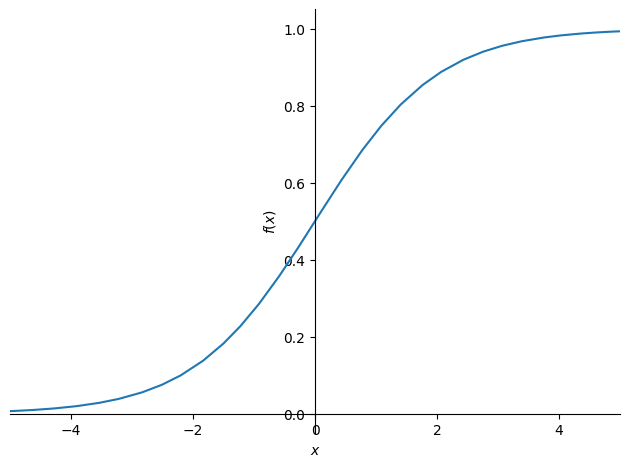

In [29]:
# If we can make our preds 0 to 1 it makes things easier to optimise for and might improve the results
# We can run our preds through the sigmoid function, it looks like this

import sympy

sympy.plot("1/(1+exp(-x))", xlim=(-5, 5));

In [30]:
# This is build into pytorch so lets redefine cal_preds
def calc_preds(coeffs, indeps):
    return torch.sigmoid((indeps * coeffs).sum(axis=1))


# Lets see how our training does now
coeffs = train_model(lr=100)
accuracy(coeffs)

Epoch loss: 0.5112411975860596
Epoch loss: 0.3210502564907074
Epoch loss: 0.31387194991111755
Epoch loss: 0.2766646146774292
Epoch loss: 0.24391253292560577
Epoch loss: 0.21307159960269928
Epoch loss: 0.21162094175815582
Epoch loss: 0.20770388841629028
Epoch loss: 0.20502661168575287
Epoch loss: 0.20518986880779266
Epoch loss: 0.20513595640659332
Epoch loss: 0.2044714093208313
Epoch loss: 0.20170290768146515
Epoch loss: 0.19249822199344635
Epoch loss: 0.18868441879749298
Epoch loss: 0.18855583667755127
Epoch loss: 0.18855227530002594
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.1885521560907364
Epoch loss: 0.18855203688144684
Epoch loss: 0.1885513961315155


tensor(0.8258)

Generally speaking if you are wondering why your model with a binary dependent variable isnt
training very well, chuck it through a sigmoid

In [31]:
show_coeffs()

{'Age': tensor(-25.6366),
 'SibSp': tensor(-7.0167),
 'Parch': tensor(7.4201),
 'LogFare': tensor(24.2842),
 'Sex_male': tensor(-297.6207),
 'Sex_female': tensor(248.9422),
 'Pclass_1': tensor(99.5087),
 'Pclass_2': tensor(42.1052),
 'Pclass_3': tensor(-188.6333),
 'Embarked_C': tensor(28.5645),
 'Embarked_Q': tensor(0.0219),
 'Embarked_S': tensor(-76.5533)}

### Matrix product

To speed things up a bit we can replace the element wise mult + sum with a matrix multiply. Multiplying elements together and then addicing across rows is identical to doing a matrix-vector product.
In python this is th `@` operator.

In [32]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid(indeps @ coeffs)


# Lets see how our training does now - exact same results
coeffs = train_model(lr=100)
coeffs, accuracy(coeffs)

Epoch loss: 0.5112411975860596
Epoch loss: 0.3210502564907074
Epoch loss: 0.31387200951576233
Epoch loss: 0.27666470408439636
Epoch loss: 0.2439126819372177
Epoch loss: 0.21307159960269928
Epoch loss: 0.2116209715604782
Epoch loss: 0.20770390331745148
Epoch loss: 0.20502661168575287
Epoch loss: 0.20518986880779266
Epoch loss: 0.20513595640659332
Epoch loss: 0.2044714242219925
Epoch loss: 0.20170296728610992
Epoch loss: 0.1924983710050583
Epoch loss: 0.18868443369865417
Epoch loss: 0.18855583667755127
Epoch loss: 0.18855227530002594
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.18855218589305878
Epoch loss: 0.1885521560907364
Epoch loss: 0.18855203688144684
Epoch loss: 0.1885513961315155


(tensor([-2.5637e+01, -7.0167e+00,  7.4201e+00,  2.4284e+01, -2.9762e+02,
          2.4894e+02,  9.9509e+01,  4.2105e+01, -1.8863e+02,  2.8565e+01,
          2.1912e-02, -7.6553e+01], requires_grad=True),
 tensor(0.8258))

## Neural network

### Shape

In order to do matrix-matrix products we need to change to coeffs into a olumn vector (matrix with a single column).

In [33]:
torch.manual_seed(442)
old = init_coeffs()


# Note the flag in torch.rand
def init_coeffs():
    return (torch.rand(n_coeff, 1) - 0.5).requires_grad_()


# # We need to do the same for the dependent variables
trn_dep = trn_dep[:, None]
val_dep = val_dep[:, None]

torch.manual_seed(442)
old, init_coeffs()

(tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
          0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True),
 tensor([[-0.4629],
         [ 0.1386],
         [ 0.2409],
         [-0.2262],
         [-0.2632],
         [-0.3147],
         [ 0.4876],
         [ 0.3136],
         [ 0.2799],
         [-0.4392],
         [ 0.2103],
         [ 0.3625]], requires_grad=True))

In [34]:
# Things shold still work as before
coeffs = train_model(lr=1.4)
coeffs, accuracy(coeffs)

Epoch loss: 0.5005103349685669
Epoch loss: 0.4919874668121338
Epoch loss: 0.47518783807754517
Epoch loss: 0.45222362875938416
Epoch loss: 0.4284096956253052
Epoch loss: 0.40952667593955994
Epoch loss: 0.39749735593795776
Epoch loss: 0.3908260464668274
Epoch loss: 0.38737449049949646
Epoch loss: 0.38563528656959534
Epoch loss: 0.3847619295120239
Epoch loss: 0.384319931268692
Epoch loss: 0.384093314409256
Epoch loss: 0.38397541642189026
Epoch loss: 0.3839130699634552
Epoch loss: 0.3838796615600586
Epoch loss: 0.3838614523410797
Epoch loss: 0.38385143876075745
Epoch loss: 0.38384586572647095
Epoch loss: 0.38384270668029785
Epoch loss: 0.3838408589363098
Epoch loss: 0.38383984565734863
Epoch loss: 0.3838392496109009
Epoch loss: 0.38383886218070984
Epoch loss: 0.3838386535644531
Epoch loss: 0.3838385343551636
Epoch loss: 0.3838384747505188
Epoch loss: 0.38383838534355164
Epoch loss: 0.38383838534355164
Epoch loss: 0.38383838534355164


(tensor([[-4.5388],
         [-0.6234],
         [-0.5055],
         [-5.7089],
         [-7.5451],
         [-4.6016],
         [-2.3071],
         [-2.1971],
         [-5.9834],
         [-2.3995],
         [-0.9427],
         [-8.0929]], requires_grad=True),
 tensor(0.5955))

### Make the network

In [35]:
# We now need coeffs for each layer
# Layer 1 takes n_coeff inputs and creates n_hidden outputs (so a n_coeff x n_hidden matrix)
# divide by n_hidden so that summing ends up with numbers of a similar magnitude
# Layer 2 takes n_hidden inputs and creates a single output (so an n_hidden x 1 matrix)
# Layer 2 needs a constant term
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.2
    const = torch.rand(1)[0]

    layer1.requires_grad_()
    layer2.requires_grad_()
    const.requires_grad_()

    return layer1, layer2, const


init_coeffs()

(tensor([[ 8.6085e-03,  1.1621e-02, -1.7875e-02, -4.7660e-05, -9.1653e-03,
          -1.2055e-02,  2.4451e-03,  4.3306e-03, -2.6680e-03,  1.5661e-02,
          -7.4372e-03, -1.2754e-02,  1.6642e-02,  6.4613e-03,  1.1806e-02,
          -1.3112e-02,  2.0256e-02, -1.3371e-02, -1.1558e-02,  5.7342e-03],
         [ 2.0362e-02,  1.4169e-02,  4.1735e-03, -2.5189e-03,  2.1770e-02,
          -1.7039e-02, -2.2760e-02,  7.2361e-03, -2.3242e-02, -1.5196e-02,
          -6.4856e-03, -4.2483e-03,  2.3410e-02,  1.9865e-02, -2.4246e-02,
           1.0489e-02, -1.5091e-02,  2.0924e-02,  5.4456e-03,  3.9526e-03],
         [-8.5397e-03, -9.4113e-03,  2.4307e-02, -1.2668e-02, -1.2511e-02,
          -3.8517e-03,  1.6682e-02, -2.4877e-02, -1.2806e-02,  4.4610e-03,
          -2.3351e-02,  1.8625e-02, -5.4769e-03,  1.7216e-02, -1.7238e-02,
           5.5614e-03, -1.4329e-02,  1.2236e-03, -8.1988e-03, -4.2252e-03],
         [-6.5878e-03,  1.8432e-02,  1.8717e-02,  2.3861e-02, -1.6437e-03,
          -1.5382e-02,

In [36]:
# Now we need to update our cal_preds and update_coeffs to deal with the multiple layers
import torch.nn.functional as F


def calc_preds(coeffs, indeps):
    layer1, layer2, const = coeffs

    # Do our L1 matrix multiply and relu
    res = F.relu(indeps @ layer1)

    # L2 matrix multiple and apply L2s constant
    res = res @ layer2 + const

    # Chuck it through a sigmoid
    return torch.sigmoid(res)


# Pretty much the same but we have to do it for each layer
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub(layer.grad * lr)

In [37]:
coeffs = train_model(lr=1.4)
accuracy(coeffs)

Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633
Epoch loss: 0.5427940487861633


tensor(0.4045)

### Deep learning

Our NN isnt very deep so lets change things up and create a bunch of additional coeffs for each layer.

In [38]:
def init_coeffs():
    hiddens = [10, 10, 20, 10]  # list of hidden layers to create and their size
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i + 1]) - 0.3) / sizes[i + 1] * 4 for i in range(n - 1)]
    consts = [(torch.rand(1)[0] - 0.5) * 0.1 for i in range(n - 1)]
    for l in layers + consts:
        l.requires_grad_()
    return layers, consts


# We need to lip over the layers now as there can be more than 2
def calc_preds(coeffs, indeps):
    layers, consts = coeffs
    n = len(layers)
    res = indeps
    for i, l in enumerate(layers):
        res = res @ l + consts[i]
        if i != n - 1:
            res = F.relu(res)
    return torch.sigmoid(res)


# Need to account for layers and consts being separate
def update_coeffs(coeffs, lr):
    layers, consts = coeffs
    for layer in layers + consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [44]:
coeffs = train_model(lr=100)
accuracy(coeffs)

Epoch loss: 0.5491295456886292
Epoch loss: 0.38577449321746826
Epoch loss: 0.3854386806488037
Epoch loss: 0.38520488142967224
Epoch loss: 0.38503217697143555
Epoch loss: 0.3848991096019745
Epoch loss: 0.3847932517528534
Epoch loss: 0.38470694422721863
Epoch loss: 0.38463521003723145
Epoch loss: 0.3845745921134949
Epoch loss: 0.3845226466655731
Epoch loss: 0.3844776451587677
Epoch loss: 0.38443827629089355
Epoch loss: 0.3844035267829895
Epoch loss: 0.38437262177467346
Epoch loss: 0.3843449652194977
Epoch loss: 0.38432005047798157
Epoch loss: 0.3842974305152893
Epoch loss: 0.38427698612213135
Epoch loss: 0.3842582404613495
Epoch loss: 0.384240984916687
Epoch loss: 0.38422515988349915
Epoch loss: 0.3842105567455292
Epoch loss: 0.384196937084198
Epoch loss: 0.38418442010879517
Epoch loss: 0.384172648191452
Epoch loss: 0.38416168093681335
Epoch loss: 0.3841513991355896
Epoch loss: 0.38414183259010315
Epoch loss: 0.3841327428817749


tensor(0.5955)